In [2]:
from radar import *
from rain import *

import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import pandas as pd 
import numpy as np
%matplotlib inline

In [11]:
TOP50 = pd.read_csv('../../Paper/TOP50_Events/TOP50_events_Charlotte.csv', parse_dates=[0,1])

new instance of Radar object for: CHARLOTTE 2006-08


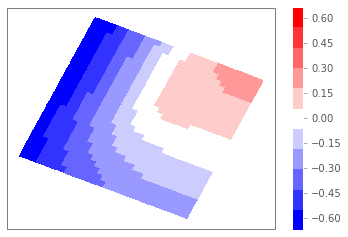

In [38]:
c = Radar('Charlotte', t=TOP50.t_begin[0], how='hdf5')
centralized_difference(c, TOP50.t_begin[0], TOP50.t_end[0], cmap = plt.cm.get_cmap('bwr', 11))

In [31]:
def centralized_difference(c, t_start, t_end, r=15, buffer=16, save=False, **kwargs):
    l =[]
    ixy0 = buffer
    ixyn = c.lat.shape[1]-buffer
    it0 = c.time.get_loc(t_start)
    itn = c.time.get_loc(t_end)
    for ix in range(ixy0, ixyn):
        for iy in range(ixy0, ixyn):
            for it in range(it0, itn):
                if c.box[it, iy, ix] > 0:
                    l.append((c.box[it+1, iy-r:iy+r+1, ix-r:ix+r+1]-c.box[it, iy, ix]))

    test = np.mean(np.array(l), axis=0)
    if 'vmin' not in kwargs.keys():
        peak = max(np.abs(np.min(test)), np.max(test))
        kwargs.update(dict(vmin = -peak, vmax = peak))

    ax = plt.axes(projection=ccrs.PlateCarree())
    scat = ax.pcolor(c.lon[iy-r:iy+r+1, ix-r:ix+r+1], c.lat[iy-r:iy+r+1, ix-r:ix+r+1], test, **kwargs)
    ax.scatter(c.lon[iy, ix], c.lat[iy, ix], edgecolor='white', facecolor='None')
    plt.colorbar(scat);
    if save:
        plt.savefig("/home/jsignell/Paper/Notebooks/output/Centralized difference radius={r} ({t} storm).png".format(r=r, t=t_start))

In [37]:
for n in range(0,10):
    c = Radar('Charlotte', t=TOP50.t_begin[n], how='hdf5')

    kwargs = dict(save=True, cmap = plt.cm.get_cmap('bwr', 11))
    centralized_difference(c, TOP50.t_begin[n], TOP50.t_end[n], **kwargs)
    plt.close()

new instance of Radar object for: CHARLOTTE 2006-08
new instance of Radar object for: CHARLOTTE 2006-06
new instance of Radar object for: CHARLOTTE 2003-07
new instance of Radar object for: CHARLOTTE 2010-05
new instance of Radar object for: CHARLOTTE 2010-08
new instance of Radar object for: CHARLOTTE 2005-07
new instance of Radar object for: CHARLOTTE 2014-05
new instance of Radar object for: CHARLOTTE 2007-06
new instance of Radar object for: CHARLOTTE 2014-07
new instance of Radar object for: CHARLOTTE 2012-05


/home/jsignell/miniconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


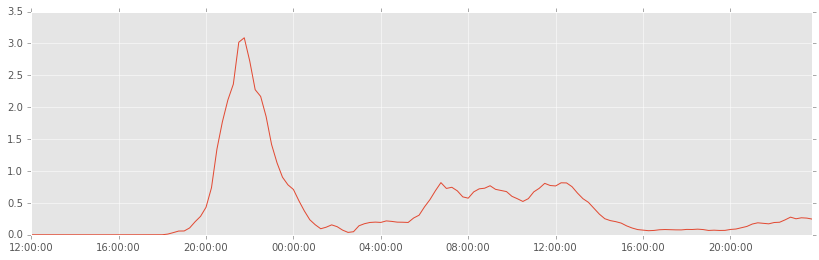

In [5]:
plt.figure(figsize=(14,4))
plt.plot(c.time[2832:], np.nanmean(c.box, axis=(1,2))[2832:]);